In [2]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.tree import _tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Load data
dataset_name = 'D:\\sampled_data2.csv'
df = pd.read_csv(dataset_name)
print(df.shape)
df.head()

(25200, 8)


,step,customer,age,gender,merchant,category,amount,fraud
0,16-Jul,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,22-Aug,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,3-Jun,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,1-Jul,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,6-Mar,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [4]:
df.loc[df['fraud'] == 0, 'fraud1'] = 'Not Fraud' 
df.loc[df['fraud'] == 1, 'fraud1'] = 'Fraud' 
df=df.drop(["fraud"],axis=1)


df["amount"]=df["amount"].astype(int)

In [5]:
entity_column = 'customer'
merchant_column = 'merchant'
target_column= 'fraud1'
datetime_columns = 'step'

In [6]:
if entity_column == '':
    df['entity_column']= df.index.tolist()
    entity_column = 'entity_column' 
    
if merchant_column == '':
    df['merchant_column']= df.index.tolist()
    merchant_column = 'merchant_column'
    
if datetime_columns == '':
    df['datetime_columns']= df.index.tolist()    
    datetime_columns = 'datetime_columns'

numerical_columns = df._get_numeric_data().columns.values.tolist()
print(numerical_columns)

['amount']


Ttest_indResult(statistic=-20.363850298722625, pvalue=1.9076858620186158e-91)

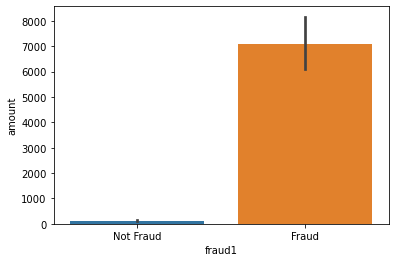

In [7]:
sns.barplot(data=df, x='fraud1', y='amount')


#Independent T test

stats.ttest_ind(df['amount'][df['fraud1'] == 'Not Fraud'],
                df['amount'][df['fraud1'] == 'Fraud'])

##There is statistical significance as p<0.05

<AxesSubplot:xlabel='category', ylabel='amount'>

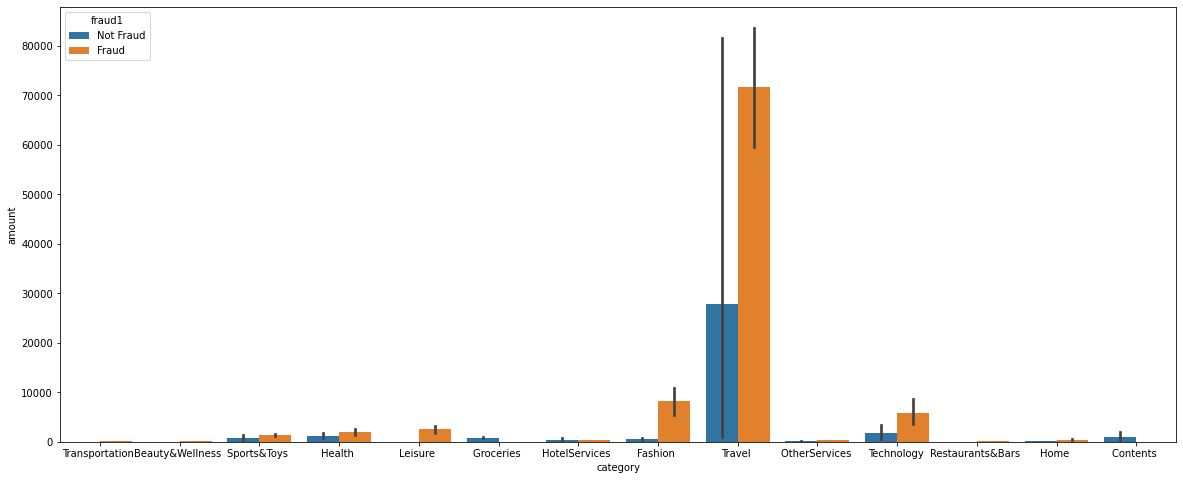

In [8]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='category', y='amount',hue="fraud1")



<AxesSubplot:xlabel='age', ylabel='amount'>

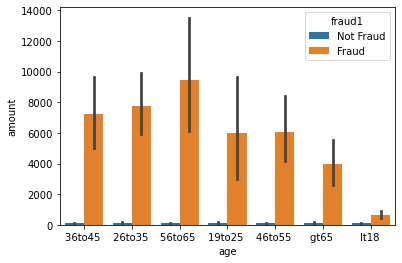

In [9]:
sns.barplot(data=df, x='age', y='amount',hue="fraud1")

<AxesSubplot:xlabel='gender', ylabel='amount'>

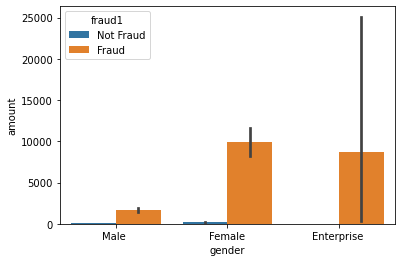

In [10]:
sns.barplot(data=df, x='gender', y='amount',hue="fraud1")

0.983806426611797
[[ 4950   450]
 [  555 12945]]


<AxesSubplot:>

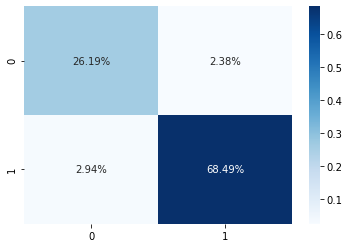

In [11]:
X = df.drop(columns=[entity_column,merchant_column,target_column,datetime_columns])
y = df[target_column]



# Label Encoding of Categorical Columns
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42,stratify=y)

rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)


if df[target_column].nunique()> 2:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')